In [1]:
import numpy as np
import csv
import re
from ahrs.ahrs.filters import Mahony

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion

## Ground Truth Robot ARM UR10e

In [2]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_dev.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(\d+\.\d+)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 8))
print(np.shape(GT))
time_columns = [0]
translate_columns = [1,2,3]
quaternion_columns = [4,5,6,7]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
for q in quaternion_GT_pre:
    print(q)

(8418, 8)
Time:
[['1687433668.15468265']
 ['1687433668.15468265']
 ['1687433668.15468265']
 ...
 ['1687433735.294115279']
 ['1687433735.353269730']
 ['1687433735.353269730']]
Transtale:
[['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ...
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']]
Quaternion:
[['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ...
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']]
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '0.000' '0.000' '1.000']
['0.000' '

['0.000' '0.000' '0.885' '0.466']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.869' '0.494']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.857' '0.515']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.840' '0.542']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.826' '0.563']
['0.000' '0.000' '0.808' '0.590']
['0.000' '0.00

['0.000' '0.000' '0.385' '0.923']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.360' '0.933']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.334' '0.943']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.303' '0.953']
['0.000' '0.000' '0.272' '0.962']
['0.000' '0.000' '0.272' '0.962']
['0.000' '0.000' '0.272' '0.962']
['0.000' '0.000' '0.272' '0.962']
['0.000' '0.000' '0.272' '0.962']
['0.000' '0.00

['0.000' '0.000' '0.936' '0.351']
['0.000' '0.000' '0.936' '0.351']
['0.000' '0.000' '0.936' '0.351']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.946' '0.325']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.955' '0.297']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.962' '0.272']
['0.000' '0.000' '0.971' '0.237']
['0.000' '0.000' '0.971' '0.237']
['0.000' '0.000' '0.971' '0.237']
['0.000' '0.000' '0.971' '0.237']
['0.000' '0.000' '0.971' '0.237']
['0.000' '0.00

['0.000' '0.000' '0.170' '0.986']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.145' '0.989']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.122' '0.992']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.098' '0.995']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.000' '0.077' '0.997']
['0.000' '0.00

# IMU FSM-9

In [30]:
#Data gathering
#f_name = '/home/kuli/Desktop/WeAreVR/IMU_test_data/r90l90l90r90.txt'
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position_dev.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,11):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

# Convert the list of strings to a NumPy array of floats
print(np.shape(data))
print(data[0])
data = np.array(data[2:]).astype(float)
ypr_columns = [1,2,3]
acc_columns = [4,5,6]
gyro_columns = [7,8,9]
mag_columns = [10,11,12]
ypr_data = data[:, ypr_columns]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
print("Yaw Pitch Rol:")
print(ypr_data)
print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 

0
[]
1
['Sensors:']
2
['     0. Accelerometer @ 2000 us.']
3
['     1. Gyroscope @ 2000 us.']
4
['     2. Magnetometer @ 2000 us.']
5
['     3. Ambient Light Sensor disabled.']
6
['     4. Pressure Sensor disabled.']
7
['     5. Proximity Sensor disabled.']
8
['     6. Sensor Fusion @ 2000 us.']
9
[]
10
['9740', ' -2.4928', ' -1.1644', ' 125.2701', ' -0.2031', ' 0.4346', ' -9.9795', '   0.00', '  -0.00', '   0.00', '  -0.18', '  -0.30', '   0.60 ']
(11055, 13)
['9740', ' -2.4928', ' -1.1644', ' 125.2701', ' -0.2031', ' 0.4346', ' -9.9795', '   0.00', '  -0.00', '   0.00', '  -0.18', '  -0.30', '   0.60 ']
Yaw Pitch Rol:
[[ -2.4928  -1.1644 125.2701]
 [ -2.4928  -1.1644 125.2701]
 [ -2.4928  -1.1644 125.2701]
 ...
 [ -2.4722  -0.9339 131.031 ]
 [ -2.4722  -0.9339 131.031 ]
 [ -2.4722  -0.9339 131.031 ]]
Acc:
[[-0.1836  0.4375 -9.9248]
 [-0.1182  0.4346 -9.9111]
 [-0.1816  0.4131 -9.9824]
 ...
 [-0.1709  0.4121 -9.9014]
 [-0.1562  0.4014 -9.8594]
 [-0.1533  0.4014 -9.8408]]
Gyro:
[[ 0. -

In [5]:
#Computing quaternion Mahony
quaternions_IMU = Mahony(gyr=gyro_data, acc=acc_data, mag = mag_data, frequency = 125).Q   # Using IMU with sample rate 8ms (default)
quaternions_IMU_NM = Mahony(gyr=gyro_data, acc=acc_data, frequency = 125).Q   # Using IMU with sample rate 8ms (default)
for q in quaternions_IMU:
    print(q)

[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 0.02084194]
[0.01124821 0.15276942 0.98797803 

[ 0.00154898  0.99861131 -0.03613456 -0.03830587]
[ 0.00157079  0.99844907 -0.04021963 -0.03846258]
[ 0.00155411  0.99826792 -0.04434198 -0.03863338]
[ 0.00165405  0.99807103 -0.04848522 -0.03873833]
[ 0.00161502  0.99785683 -0.05256153 -0.03894136]
[ 0.00169218  0.99762586 -0.05669448 -0.03905784]
[ 0.00176247  0.99737857 -0.06083126 -0.03914647]
[ 0.00179506  0.99711586 -0.06492206 -0.03926652]
[ 0.00180284  0.99683894 -0.06897396 -0.03938871]
[ 0.00187046  0.99654254 -0.07310837 -0.0394289 ]
[ 0.00197673  0.99622669 -0.07723686 -0.03953395]
[ 0.00202026  0.99589748 -0.08132522 -0.03962741]
[ 0.00209501  0.99555162 -0.08540698 -0.03972686]
[ 0.002167    0.99518585 -0.08952663 -0.03981719]
[ 0.00226221  0.99480695 -0.09360558 -0.03989996]
[ 0.00225159  0.99441539 -0.09764526 -0.03997966]
[ 0.00226388  0.99400343 -0.10172367 -0.04005443]
[ 0.00229429  0.99356796 -0.10584061 -0.04018971]
[ 0.00238889  0.99312159 -0.10992326 -0.04025772]
[ 0.00239252  0.99266005 -0.11400605 -0.0402855 ]


[ 5.33929603e-04 -8.88534786e-01 -4.58657764e-01  1.17772998e-02]
[ 6.08036833e-04 -8.90392769e-01 -4.55035022e-01  1.19781624e-02]
[ 6.19232031e-04 -8.92234692e-01 -4.51407446e-01  1.21733008e-02]
[ 6.86707036e-04 -8.94067719e-01 -4.47760243e-01  1.23776380e-02]
[ 7.64722759e-04 -8.95879024e-01 -4.44118692e-01  1.26006508e-02]
[ 7.82324534e-04 -8.97692042e-01 -4.40436856e-01  1.27969133e-02]
[ 8.35867626e-04 -8.99477464e-01 -4.36773359e-01  1.29855895e-02]
[ 8.59816473e-04 -9.01247529e-01 -4.33103788e-01  1.31628280e-02]
[ 8.77220086e-04 -9.03003156e-01 -4.29426589e-01  1.33167210e-02]
[ 0.00091881 -0.90474259 -0.4257438   0.01349888]
[ 0.00097177 -0.90647248 -0.42204307  0.01365068]
[ 0.0009865  -0.90818599 -0.41833764  0.0138149 ]
[ 0.00103836 -0.90987776 -0.41463707  0.01405326]
[ 0.00099297 -0.91157691 -0.41088325  0.01419528]
[ 0.00105274 -0.91323661 -0.40717245  0.01443563]
[ 0.00113539 -0.91489668 -0.40341995  0.01466678]
[ 0.00119837 -0.91653615 -0.39967184  0.01491519]
[ 0.00

[0.02544693 0.00480572 0.9995418  0.01567011]
[0.02546802 0.0029575  0.9995482  0.01568532]
[0.02546448 0.001077   0.99955172 0.01570858]
[ 2.53670870e-02 -8.61381394e-04  9.99554899e-01  1.56771657e-02]
[ 0.02537255 -0.00282308  0.99955088  0.01569413]
[ 0.0253671  -0.00478293  0.99954348  0.01569908]
[ 0.02536007 -0.00678214  0.99953124  0.0157532 ]
[ 0.02535235 -0.0088972   0.99951448  0.01577673]
[ 0.02537409 -0.01105196  0.99949215  0.01579376]
[ 0.02537257 -0.01325255  0.99946545  0.01579325]
[ 0.02530074 -0.01550493  0.99943471  0.01580312]
[ 0.02522948 -0.01779477  0.99939917  0.01575198]
[ 0.02512724 -0.02012625  0.99935821  0.01570737]
[ 0.02505405 -0.02245768  0.99931023  0.01571674]
[ 0.02497698 -0.02490759  0.99925409  0.01571675]
[ 0.02494442 -0.02738296  0.99918993  0.01573028]
[ 0.0248562  -0.02985436  0.99912052  0.01578221]
[ 0.02490054 -0.03241029  0.99903981  0.01577972]
[ 0.02487707 -0.03497577  0.99895394  0.01577477]
[ 0.02480305 -0.03753425  0.99886249  0.015802

[-0.01037699 -0.46938804 -0.88281947 -0.01403475]
[-0.01035063 -0.46562433 -0.8848085  -0.01416934]
[-0.0103954  -0.46186767 -0.88677224 -0.01432432]
[-0.01045973 -0.45810522 -0.88871884 -0.01445794]
[-0.01058515 -0.45437088 -0.89062928 -0.01464715]
[-0.01075057 -0.45060697 -0.89253454 -0.01482822]
[-0.01088802 -0.4468358  -0.89442387 -0.01500523]
[-0.01102218 -0.44308071 -0.89628539 -0.01518174]
[-0.01114623 -0.43932066 -0.89813039 -0.01532721]
[-0.01119467 -0.435507   -0.89998243 -0.01549073]
[-0.01129137 -0.43169646 -0.90181256 -0.01564524]
[-0.01143748 -0.42791777 -0.90360726 -0.01579505]
[-0.0114766  -0.42408404 -0.90540996 -0.01593176]
[-0.01156972 -0.42025691 -0.90718899 -0.01607502]
[-0.01166217 -0.41642518 -0.90895145 -0.01616583]
[-0.0117826  -0.41260958 -0.91068508 -0.0163461 ]
[-0.01192046 -0.40876565 -0.91241266 -0.01648298]
[-0.01191508 -0.40489056 -0.91413695 -0.01659236]
[-0.01198294 -0.40102297 -0.91583631 -0.0167582 ]
[-0.01218275 -0.39719616 -0.91749619 -0.01695702]


[ 0.00627048  0.99128747  0.12782526 -0.03115349]
[ 0.00625523  0.99073115  0.13207153 -0.03114117]
[ 0.00621304  0.99015951  0.13631574 -0.03104131]
[ 0.00623405  0.98957393  0.14051303 -0.03099467]
[ 0.00622826  0.98896433  0.1447498  -0.03095589]
[ 0.00628639  0.98833719  0.14897882 -0.03090945]
[ 0.00622709  0.98769322  0.15320815 -0.0308317 ]
[ 0.0062614   0.98703736  0.1573938  -0.03074454]
[ 0.00624374  0.98635872  0.1616169  -0.0306181 ]
[ 0.00616339  0.98565655  0.16585402 -0.03058783]
[ 0.00608334  0.98493799  0.1700859  -0.03051114]
[ 0.00609374  0.9842072   0.17427296 -0.03046285]
[ 0.0060849   0.98345136  0.1784959  -0.0304239 ]
[ 0.00600572  0.98267921  0.18271415 -0.03034883]
[ 0.00599681  0.98190042  0.18687617 -0.03021433]
[ 0.0059671   0.98110502  0.19103288 -0.03006285]
[ 0.00596673  0.98028035  0.19523619 -0.02996101]
[ 0.00590986  0.97943663  0.19943933 -0.02988171]
[ 0.00590889  0.97858396  0.2035971  -0.02977802]
[ 0.00595719  0.97771286  0.20776799 -0.0295727 ]


In [8]:
#Unifie the axis quaternions_GT (z > y) to (y > -x) quaternions_IMU
rot_WM = Quaternion([0.51, -0.51, 0.51, 0.51])
#Unifie the axis quaternions_GT (z > y) to (? > ?) quaternions_IMU_NM
#rot_NM = Quaternion([0.51, 0.51, 0.51, 0.51])

quaternion_GT = np.copy(quaternion_GT_pre)
for index, item in enumerate(quaternion_GT):
    q = rot_WM * Quaternion(item) * rot_WM.inverse
    quaternion_GT[index] = [np.format_float_positional(q[0]), np.format_float_positional(q[1]), np.format_float_positional(q[2]), np.format_float_positional(q[3])]
for q in quaternion_GT:
    print(q)

['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.' '1.' '0.']
['0.' '0.'

['0.' '-0.8340000000000001' '0.5510000000000002' '0.']
['0.' '-0.8340000000000001' '0.5510000000000002' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.000000000000000013' '-0.8520000000000001' '0.5240000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['0.' '-0.8680000000000001' '0.4970000000000001' '0.']
['-0.00000000000000001' '-0.8840000000000001' '0.

['0.' '-0.877' '0.4810000000000001' '0.']
['0.' '-0.877' '0.4810000000000001' '0.']
['0.' '-0.877' '0.4810000000000001' '0.']
['0.' '-0.877' '0.4810000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.865' '0.5010000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001' '0.']
['-0.00000000000000002' '-0.849' '0.5290000000000001

['0.000000000000000027' '-0.417' '0.909' '0.']
['0.000000000000000027' '-0.417' '0.909' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['-0.00000000000000002' '-0.38599999999999995' '0.922' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.356' '0.9350000000000002' '0.']
['0.' '-0.32599999999999996' '0.9449999999999998' '0.']
['0.' '-0.32599999999999996' '0.9449999999999998' '0.']
['0.' '-0.32599999999999996' '0.9449999999999998' '0.']
['0.' '-0.3259999

['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['-0.00000000000000002' '-0.7470000000000001' '0.6640000000000001'
 '0.000000000000000055']
['0.000000000000000003' '-0.7650000000000001' '0.6440000000000001' '0.']
['0.000000000000000003' '-0.7650000000000001' '0.6440000000000001' '0.']
['0.000000000000000003' '-0.7650000000000001' '0.6440000000000001' '0.']
['0.000000000000000003' '-0.7650000000000001' '0.6440000000000001' '0.']
['0.000000000000000003' '-0.7650000000000001' '0.644000000000000

In [ ]:
#num_samples = np.shape(gyro_data)[0]
#orientation = Mahony()
#quaternions = np.tile(quaternions_IMU[0], (num_samples, 1)) # Allocate for quaternions
#for t in range(1, num_samples):
#    quaternions[t] = orientation.updateMARG(quaternions[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t], dt = 1./125. )
#print(quaternions)

In [9]:
def get_arrow(num, orientation):
    pitch = np.radians(orientation[num, 1])
    yaw = np.radians(orientation[num, 2])
    u = np.sin(yaw)*np.cos(pitch)
    v = np.cos(yaw)*np.cos(pitch)
    w = np.sin(pitch)
    return 0,0,0,u,v,w

def get_arrow_q(num, quaternions, InitialPerspectiveVector):
    u, v, w = Quaternion(quaternions[num]).rotate(InitialPerspectiveVector)
    return 0,0,0,u,v,w

def get_arrow_unwinded(num, quaternions, Vector):
    u_u, v_u, w_u = Quaternion(quaternions[num]).inverse.rotate(Vector)
    return 0,0,0,u_u,v_u,w_u


<IPython.core.display.Javascript object>


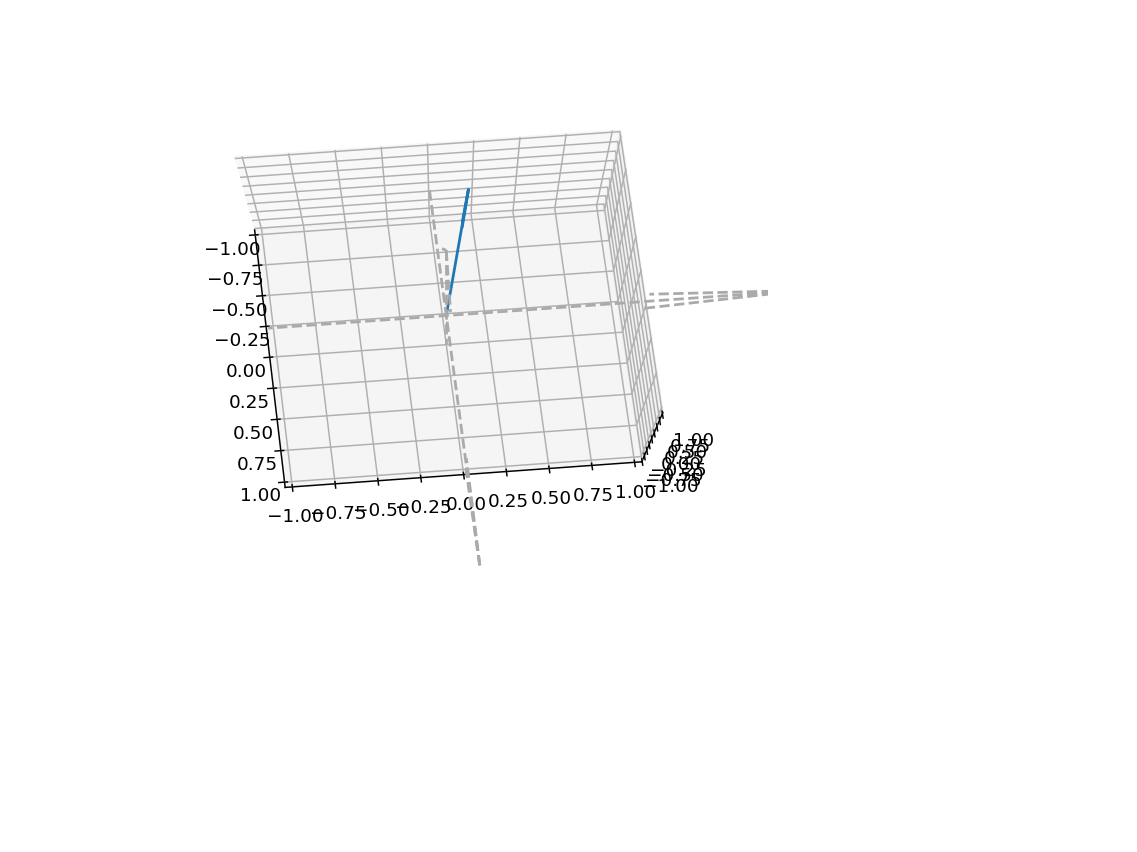

In [10]:
#Vector from sensor
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update1(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    Qui = ax.quiver(*get_arrow(num, orientation), length=1, normalize=True)

Qui = ax.quiver(*get_arrow(0, orientation), length=1, normalize=True)  
ani = FuncAnimation(fig, update1, fargs=(Qui, Qui), frames=range(0, np.shape(orientation)[0]), interval=1, blit=True, repeat = False)
plt.show()

<IPython.core.display.Javascript object>


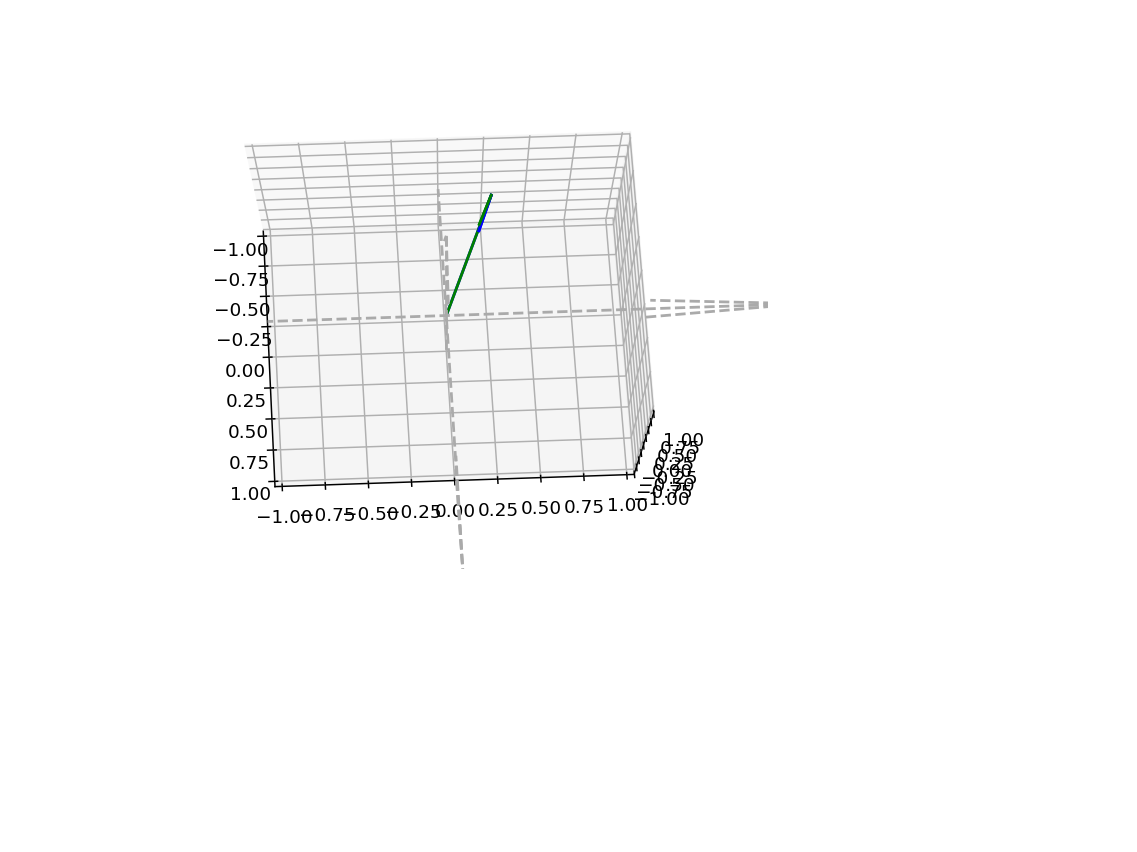

In [12]:
#Quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

quaternions = quaternions_IMU
WantToClear = 1
InitialPerspectiveVector = [1.0, 0.0, 0.0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, quaternions, InitialPerspectiveVector)
#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

def update2(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green', 'green'])  
ani = FuncAnimation(fig, update2, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=0.1, blit=True, repeat = False)
plt.show()

<IPython.core.display.Javascript object>


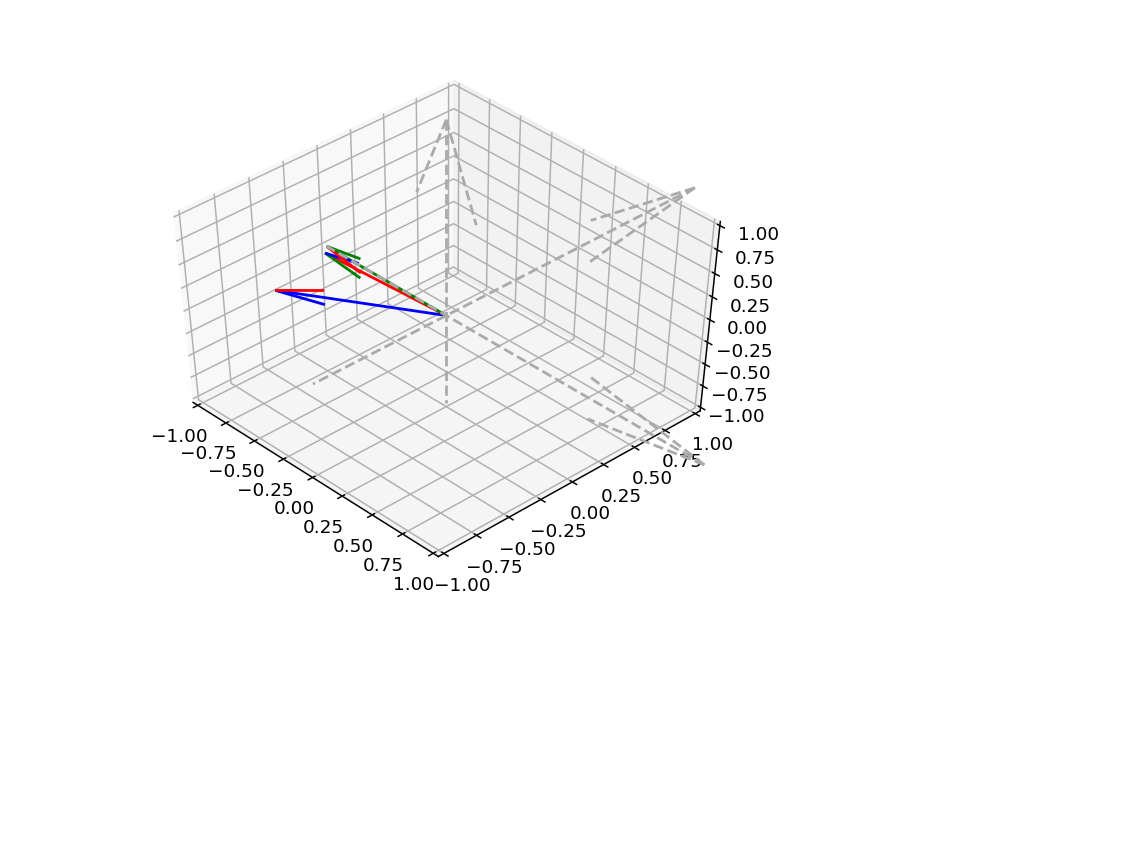

In [15]:
#Comparing Ground-Truth and IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

#orientation = ypr_data
GT_q = quaternion_GT
IMU_q = quaternions_IMU

InitialPerspectiveVector = [1,0,0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
    
    
def update3(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        #x, y, z, u, v, w = get_arrow(num, orientation)
        x, y, z, u, v, w = get_arrow_q(num, GT_q, InitialPerspectiveVector)
        x_q, y_q, z_q, u_q, v_q, w_q = get_arrow_q(num, IMU_q, InitialPerspectiveVector)
    Qui = ax.quiver([x,x_q,x0], [y,y_q,y0], [z, z_q,z0], [u, u_q,u0], [v,v_q,v0], [w,w_q,w0], length=1, normalize=True, color = ['blue','red','green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green','green'])  
ani = FuncAnimation(fig, update3, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()


<IPython.core.display.Javascript object>


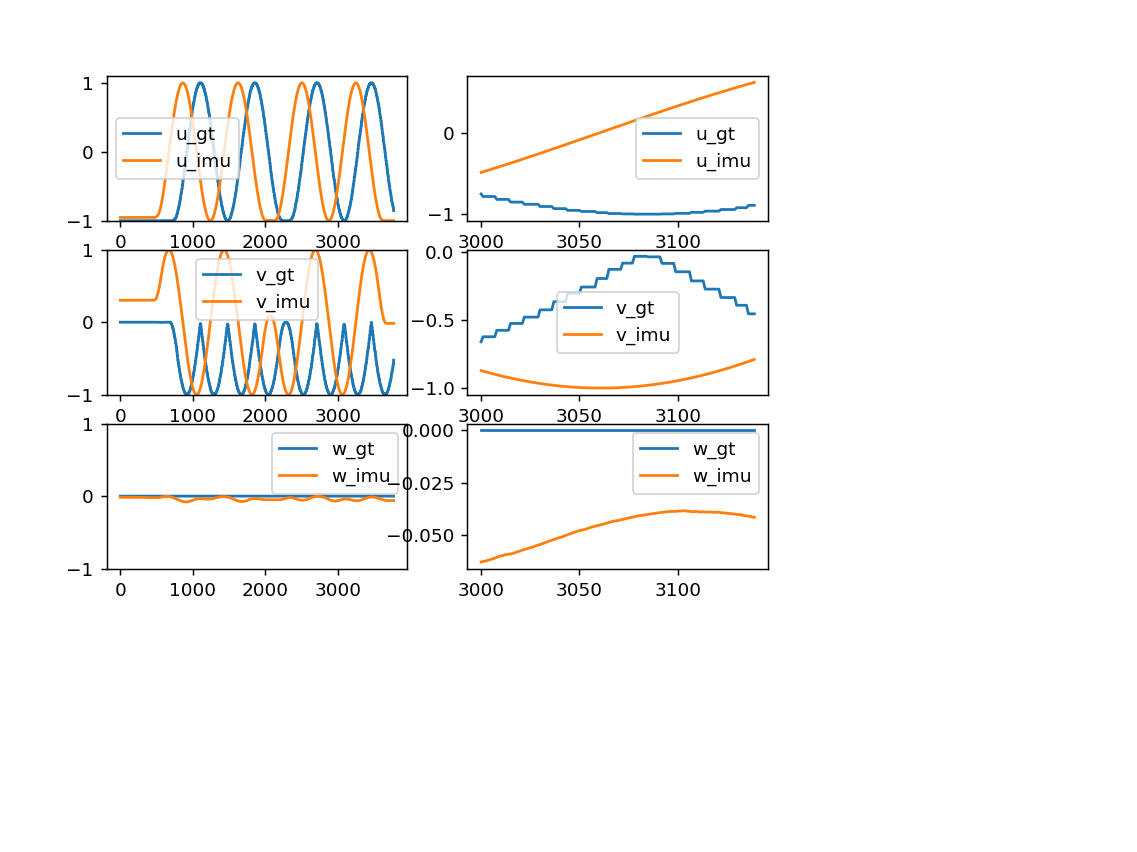

In [14]:
#Comparing Ground-Truth and IMU (Mahony) - plot
%matplotlib notebook
%matplotlib notebook

GT_q = quaternion_GT # or quaternion_GT_pre
IMU_q = quaternions_IMU

InitialPerspectiveVector_GT = [1.0, 0.0, 0.0] #(x - stable)
InitialPerspectiveVector_IMU = InitialPerspectiveVector_GT # or [1.0, 0.0, 0.0] #(z - stable)
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector_GT)

full_frames = np.minimum(np.shape(GT_q)[0],np.shape(IMU_q)[0])
zoom_frames = (3000, 3140)

data = np.zeros((full_frames, 6))

for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow_q(i, GT_q, InitialPerspectiveVector_GT)
    x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, IMU_q, InitialPerspectiveVector_IMU)
    
    ##test
    #x, y, z, u, v, w = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x, y, z, u, v, w =  get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow(i, ypr_data)
    ## end test
    
    data[i] = (u, v, w, u_imu, v_imu, w_imu)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.1)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_gt', 'w_imu'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_gt', 'w_imu'])

fig.show()

In [ ]:
#playground
InitialPerspectiveVector = [0.0 , 1.0, 0.0]
for i in range(1400, 1600):
    print(gt_q[i])
    print(Quaternion(gt_q[i]).rotate(InitialPerspectiveVector))

# Unwinding:

In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

    
def update4(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(num, quaternions, [u, v, w])
    Qui = ax.quiver([x,x_u,x0], [y,y_u,y0], [z, z_u,z0], [u, u_u,u0], [v,v_u,v0], [w,w_u,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update4, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()



In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony) - plot
InitialPerspectiveVector = [1,0,0]

full_frames = np.shape(quaternions)[0] 
zoom_frames = (500, 640)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(i, quaternions, [u, v, w])
    data[i] = (u, v, w, u_u, v_u, w_u)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.2)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_u'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_u'])

fig.show()

##### IMU with robot arm

In [ ]:
#playground

In [ ]:
#Data gathering IMU
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position2.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

# Convert the list of strings to a NumPy array of floats
print(np.shape(data))
print(data[0])
data = np.array(data[2:]).astype(float)
ypr_columns = [1,2,3]
acc_columns = [4,5,6]
gyro_columns = [7,8,9]
mag_columns = [10,11,12]
ypr_data = data[:, ypr_columns]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
print("Yaw Pitch Rol:")
print(ypr_data)
print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 

# Notes for myself
### Start the measurement of FSM-9 Sensor
- edit src code (e.g. off the energy-safe mode)
- cmake genarate with cmake-gui (on the python2.7 env)
- make the generated files (on the python2.7 env {should work on base env)
- run the .bin file with 'sudo' (!):
- sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/imu_position_test.csv
(unplug and plug is the best debug)

## UniversalRobot struggles (ur10e)
- Ros2 (galactic)
- UrDriver (for galactic)
- Ros Controller
- setup LAN (192.168.20.36 /255.255.252.0 )


### Start the measurement of robot position
- source /opt/ros/galactic/setup.bash
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=true tool_tcp_port:=50002 
<br> or <br> 
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=false tool_tcp_port:=50002 
- *put play on the teach panel, wait for command request (if you want to controll remotely)
- ros2 launch ur_bringup test_scaled_joint_trajectory_controller.launch.py
- *ros2 topic echo /joint_states --field position --csv > ~/Desktop/test.csv
Better (absolute angle) 500Hz:
- ros2 run tf2_ros tf2_echo base_link wrist_3_link 500 > ~/Desktop/robot_position_test.csv 


### test
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example
ros2 run tf2_ros tf2_echo base_link wrist_3_link 125
###
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_dev.csv
ros2 run tf2_ros tf2_echo base_link wrist_3_link 125  > ~/Desktop/WeAreVR/Measurements/robot_position_dev.csv

# TODO
- change the axis (negation problem)
- frequency boost check 'data_rate_example.c' 
- new parallel script (not GNU parallel!)
### Jupyter Notebook struggles
- install lib's using: <br>
import sys <br>
!{sys.executable} -m pip install libx <br>

In [ ]:
import sys
!{sys.executable} -m pip install pyyaml